In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [5]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

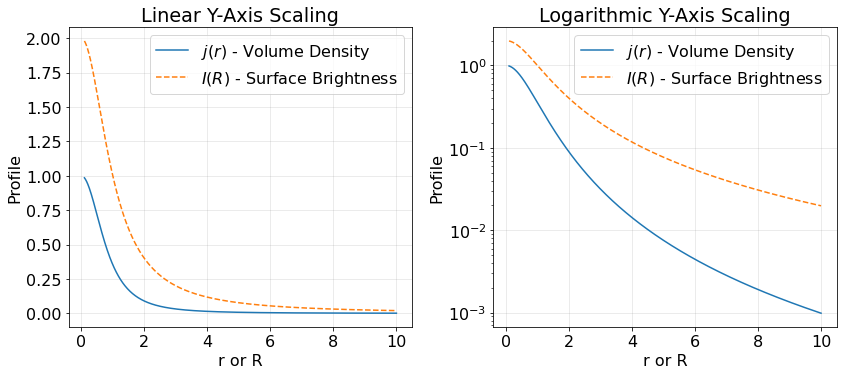

In [28]:
# Parameters
j0 = 1.0  # normalization for the volume density
a = 1.0   # scale radius
G = 1.0       # Gravitational constant (set to 1 for simplicity)
rho_0 = 1.0   # Central density

# Define the range of r and R values
r = np.linspace(1e-1, 10, 1000)
R = np.linspace(1e-1, 10, 1000)

# Calculate the volume density j(r)
j_r = j0 * (1 + (r/a)**2)**(-3/2)

# Calculate the surface brightness I(R)
I_R = 2 * j0 * a / (1 + (R**2/a**2))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5))

# Linear Y-axis scaling plot
ax1.plot(r, j_r, label=r'$j(r)$ - Volume Density', linestyle='-', color='tab:blue')
ax1.plot(R, I_R, label=r'$I(R)$ - Surface Brightness', linestyle='--', color='tab:orange')
ax1.set_xlabel('r or R')
ax1.set_ylabel('Profile')
ax1.set_title('Linear Y-Axis Scaling')
ax1.legend()
ax1.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Logarithmic Y-axis scaling plot
ax2.plot(r, j_r, label=r'$j(r)$ - Volume Density', linestyle='-', color='tab:blue')
ax2.plot(R, I_R, label=r'$I(R)$ - Surface Brightness', linestyle='--', color='tab:orange')
ax2.set_yscale('log')
ax2.set_xlabel('r or R')
ax2.set_ylabel('Profile')
ax2.set_title('Logarithmic Y-Axis Scaling')
ax2.legend()
ax2.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/modified_hubble_profile.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

# Show plot
plt.show()


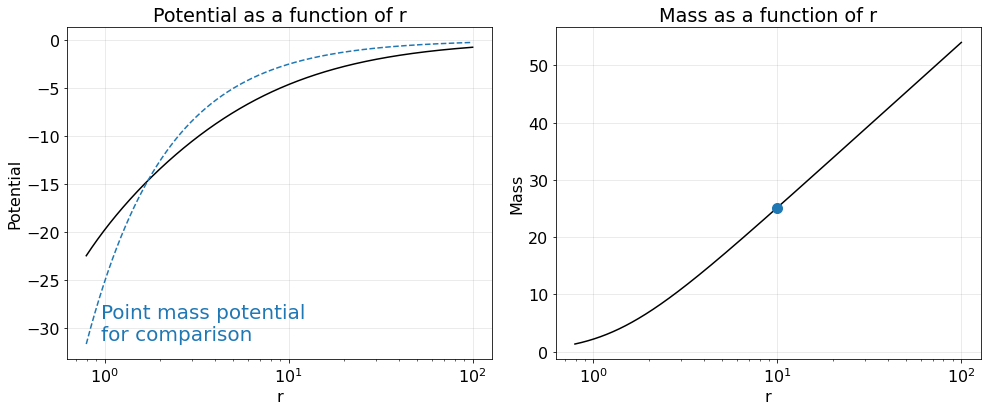

In [66]:
r = np.logspace(-0.1, 2, 10000)

# Calculate the potential Phi(r)
def potential(r):
    ln_term = np.log(2 * np.sqrt(a**2 + r**2) + 2 * r)
    return -4 * np.pi * G * rho_0 * a**3 * ln_term / r

Phi = potential(r)

# Calculate the mass M(r) using numerical integration
def mass_integrand(r):
    return 4 * np.pi * rho_0 * r**2 / (1 + (r**2 / a**2))**(3/2)

# Define the potential for a point mass with mass equal to mass_within_1
def point_mass_potential(r, M):
    return -G * M / r

M = np.array([quad(mass_integrand, 0, ri)[0] for ri in r])

# Mass within radius 1
r_point_mass = 10
mass_within_r = quad(mass_integrand, 0, r_point_mass)[0]
point_Phi = point_mass_potential(r, mass_within_1)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Potential
ax1.plot(r, Phi, label=r'$\Phi(r)$ - Potential', color='black')
ax1.plot(r, point_Phi, label=r'$\Phi_{\text{Point}}(r)$', linestyle='--', color='tab:blue')
ax1.set_xlabel('r')
ax1.set_ylabel('Potential')
ax1.set_title('Potential as a function of r')
ax1.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Label point mass curve
ax1.text(1.2*r[0], point_Phi[0], 'Point mass potential \nfor comparison', fontsize=20, color='tab:blue', verticalalignment='bottom')

ax1.set_xscale('log')

# --------------------------------

# Plot for Mass
ax2.plot(r, M, label=r'$M(r)$ - Mass', color='black')
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.set_title('Mass as a function of r')
ax2.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Mark the mass at r=1 with a red solid circle
ax2.plot(r_point_mass, mass_within_r, 'o', color='tab:blue', markersize=10)  

ax2.set_xscale('log')
#ax2.set_yscale('log')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("../Figures/modified_hubble_profile_potential_mass.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')


# Show plot
plt.show()


In [34]:
mass_within_1

2.1899012678779903